In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [57]:
df = pd.read_csv("../DeepLearning/archive_Blockchain/bitstamp_cleaned.csv")

In [58]:
df.head()

,Unix_Timestamp,DateTime,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,12/31/2011 07:52:00,4.390,4.390,4.390,4.390,0.456,2.000,4.390
1,1325346600,12/31/2011 15:50:00,4.390,4.390,4.390,4.390,48.000,210.720,4.390
2,1325350740,12/31/2011 16:59:00,4.500,4.570,4.500,4.570,37.862,171.380,4.526
3,1325350800,12/31/2011 17:00:00,4.580,4.580,4.580,4.580,9.000,41.220,4.580
4,1325391360,01/01/2012 04:16:00,4.580,4.580,4.580,4.580,1.502,6.879,4.580


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3330541 entries, 0 to 3330540
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unix_Timestamp     int64  
 1   DateTime           object 
 2   Open               float64
 3   High               float64
 4   Low                float64
 5   Close              float64
 6   Volume_(BTC)       float64
 7   Volume_(Currency)  float64
 8   Weighted_Price     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 228.7+ MB


In [59]:
df.isnull().sum()


Unix_Timestamp       0
DateTime             0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [60]:
del df['DateTime']

In [61]:
df = df.dropna()
df.head()

,Unix_Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.390,4.390,4.390,4.390,0.456,2.000,4.390
1,1325346600,4.390,4.390,4.390,4.390,48.000,210.720,4.390
2,1325350740,4.500,4.570,4.500,4.570,37.862,171.380,4.526
3,1325350800,4.580,4.580,4.580,4.580,9.000,41.220,4.580
4,1325391360,4.580,4.580,4.580,4.580,1.502,6.879,4.580


In [51]:
# df['date'] = pd.to_datetime(df['Unix_Timestamp'],unit='s').dt.date
# group = df.groupby('date')
real_price = group['Weighted_Price'].mean()

In [52]:
real_price

date
2011-12-31       4.472
2012-01-01       4.807
2012-01-02       5.000
2012-01-03       5.252
2012-01-04       5.208
                ...   
2020-09-10   10339.360
2020-09-11   10303.243
2020-09-12   10373.260
2020-09-13   10393.663
2020-09-14   10332.429
Name: Weighted_Price, Length: 3178, dtype: float64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3330541 entries, 0 to 3330540
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unix_Timestamp     int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 203.3 MB


In [63]:
df.describe() 


,Unix_Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3330541.000,3330541.000,3330541.000,3330541.000,3330541.000,3330541.000,3330541.000,3330541.000
mean,1488481347.023,4056.085,4058.902,4053.083,4056.039,9.616,30652.996,4056.035
std,69846870.878,4104.887,4108.199,4101.295,4104.831,31.610,107030.851,4104.835
min,1325317920.000,3.800,3.800,1.500,1.500,0.000,0.000,3.800
25%,1427606520.000,421.550,421.720,421.370,421.550,0.386,383.049,421.531
50%,1497076440.000,2389.260,2390.980,2386.350,2389.270,1.940,2936.700,2388.988
75%,1548932580.000,7583.000,7588.590,7577.480,7582.760,7.430,19336.109,7583.018
max,1600041600.000,19665.760,19666.000,19649.960,19665.750,5853.852,10445987.794,19663.299


In [64]:
df.corr()

,Unix_Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Unix_Timestamp,1.000,0.808,0.808,0.808,0.808,-0.100,0.191,0.808
Open,0.808,1.000,1.000,1.000,1.000,-0.064,0.289,1.000
High,0.808,1.000,1.000,1.000,1.000,-0.064,0.290,1.000
Low,0.808,1.000,1.000,1.000,1.000,-0.065,0.289,1.000
Close,0.808,1.000,1.000,1.000,1.000,-0.064,0.289,1.000
Volume_(BTC),-0.100,-0.064,-0.064,-0.065,-0.064,1.000,0.435,-0.064
Volume_(Currency),0.191,0.289,0.290,0.289,0.289,0.435,1.000,0.289
Weighted_Price,0.808,1.000,1.000,1.000,1.000,-0.064,0.289,1.000


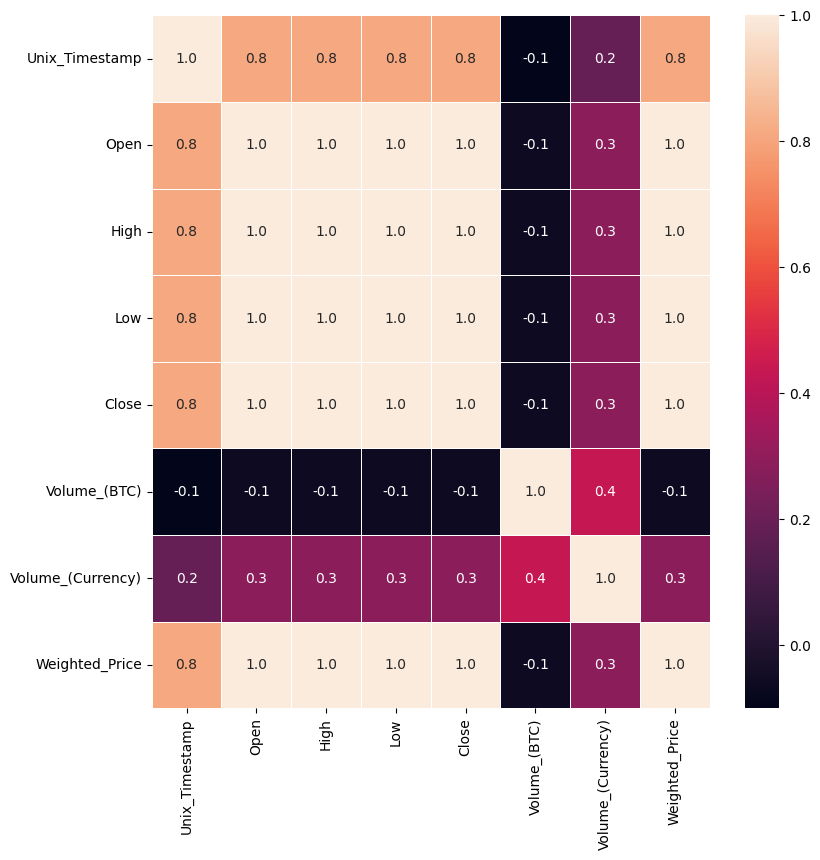

In [65]:
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()